In [ ]:
# Data Collection:

!wget https://github.com/KaiDMML/FakeNewsNet/archive/refs/heads/master.zip
!unzip master.zip


--2024-12-13 05:08:59--  https://github.com/KaiDMML/FakeNewsNet/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/KaiDMML/FakeNewsNet/zip/refs/heads/master [following]
--2024-12-13 05:08:59--  https://codeload.github.com/KaiDMML/FakeNewsNet/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ]  18.64M  5.92MB/s    in 3.2s    

2024-12-13 05:09:03 (5.92 MB/s) - ‘master.zip’ saved [19541665]

Archive:  master.zip
654361e1c8d5baa751baf1dac5032df621652280
   creating: FakeNewsNet-master/
  inflating: FakeNewsNet-master/README.m

In [ ]:
#NER with an Open-Source LLM Model:

!pip install spacy==3.6.0
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.5
    Uninstalling smart-open-7.0.5:
      Successfully uninstalled smart-open-7.0.5
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successf

In [ ]:
#Now, let's import spaCy and load the English language model:

import spacy

nlp = spacy.load("en_core_web_sm")


In [ ]:
#Next, we will read the news articles and perform NER:

import csv
import os

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Replace with your actual file path
# The os.path.join function ensures correct path construction across platforms.
news_article_path = os.path.join("FakeNewsNet-master", "Data", "BuzzFeed", "FakeNewsContent", "BuzzFeed_fake_news_content.csv")

# Create a list to store entities for all articles
all_entities = []

# Check if file exists before attempting to open
if os.path.exists(news_article_path):
    with open(news_article_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader) # skip the header row
        for row in reader:
            # Assuming the article text is in the second column (index 1)
            article_text = row[1]
            entities = extract_entities(article_text)
            all_entities.extend(entities) # appending for this article

    # Now 'all_entities' contains entities from all articles in the CSV
    print(all_entities)
else:
    print(f"Error: File not found at {news_article_path}. Please ensure the file path is correct and the file has been downloaded.")

Error: File not found at FakeNewsNet-master/Data/BuzzFeed/FakeNewsContent/BuzzFeed_fake_news_content.csv. Please ensure the file path is correct and the file has been downloaded.


In [ ]:
# Feature Engineering:

import pandas as pd
from collections import Counter

# ... (previous code) ...

# Create a DataFrame for easier analysis
df_entities = pd.DataFrame(all_entities, columns=['Entity', 'Label'])

# Feature 1: Number of entities per article
article_entity_counts = df_entities.groupby('Label').size().reset_index(name='Count')

# Feature 2: Most frequent entities
entity_counts = Counter(df_entities['Entity'])
most_common_entities = entity_counts.most_common(10)  # Top 10

# ... (other feature engineering steps) ...

In [ ]:
#Predictive Modeling:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd # Assuming you'll use pandas for your data

# ... (feature engineering code) ...

# Assume df_entities from your feature engineering is your data source
# Replace 'your_feature_columns' and 'your_target_column'
# with the actual column names from df_entities
X = df_entities[['your_feature_columns']]
y = df_entities['your_target_column']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a model (e.g., Logistic Regression)
model = LogisticRegression()

KeyError: "None of [Index(['your_feature_columns'], dtype='object')] are in the [columns]"

In [ ]:
#Text Preprocessing:

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download stopwords if you haven't already

def preprocess_text(text):
    # 1. Remove unnecessary whitespace, HTML tags, and special characters
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace

    # 2. Normalize text (convert to lowercase)
    text = text.lower()

    # 3. Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]  # Remove stop words and non-alphanumeric tokens

    return ' '.join(tokens)  # Join tokens back into a string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Integrating into your existing code:

# ... (previous code: imports, NER functions, etc.) ...

if os.path.exists(news_article_path):
    with open(news_article_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            article_text = row[1]

            # Preprocess the text before NER
            processed_text = preprocess_text(article_text)

            entities = extract_entities(processed_text)  # Use the processed text for NER
            all_entities.extend(entities)

    # ... (rest of your code) ...


In [ ]:
#Named Entity Recognition (NER):

import spacy
import pandas as pd

# ... (previous code: imports, preprocessing, etc.) ...

nlp = spacy.load("en_core_web_sm")  # Load spaCy model

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# ... (code for reading news articles) ...

all_articles_entities = []  # Store entities for all articles

if os.path.exists(news_article_path):
    with open(news_article_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            article_text = row[1]
            processed_text = preprocess_text(article_text)
            entities = extract_entities(processed_text)
            all_articles_entities.append(entities)  # Store entities for this article

# Create a DataFrame for easier analysis
df_entities = pd.DataFrame([(article_id, entity, label)
                            for article_id, entities in enumerate(all_articles_entities)
                            for entity, label in entities],
                           columns=['Article_ID', 'Entity', 'Label'])

# Create numerical features based on entity frequency
entity_counts = df_entities.groupby(['Article_ID', 'Label'])['Entity'].count().reset_index(name='Count')
entity_features = entity_counts.pivot(index='Article_ID', columns='Label', values='Count').fillna(0)

# ... (rest of your code) ...

In [ ]:
import spacy
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# ... (previous code: imports, preprocessing, NER, etc.) ...

#Assuming 'news_article_path' is defined and accessible

# Create a list to store all articles' text
all_articles_text = []

# Read article texts from the CSV file
if os.path.exists(news_article_path):
    with open(news_article_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            article_text = row[1]
            all_articles_text.append(article_text)  # Store the article text

# Add the 'Article_Text' column to the DataFrame
df_entities['Article_Text'] = pd.Series(all_articles_text)  # Assign article texts to the DataFrame


# Feature 1: Article length
df_entities['Article_Length'] = df_entities['Article_Text'].apply(lambda text: len(text.split()))

# Feature 2: Sentiment scores
analyzer = SentimentIntensityAnalyzer() # Initialize VADER sentiment analyzer

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Use compound score

df_entities['Sentiment_Score'] = df_entities['Article_Text'].apply(get_sentiment)


# Feature 3: Engagement metrics (if available in your dataset)
# Assuming you have columns like 'Likes', 'Shares', 'Comments'
# df_entities['Engagement_Score'] = df_entities['Likes'] + df_entities['Shares'] + df_entities['Comments']

# Innovative features
# Feature 4: Entity density (number of entities per word)
# Calculate the number of entities per article
df_entities['Num_Entities'] = df_entities.groupby('Article_ID')['Entity'].transform('count')
df_entities['Entity_Density'] = df_entities['Num_Entities'] / df_entities['Article_Length']


# Feature 5: Ratio of specific entity types (e.g., ORG to PERSON)
# Calculate the count of ORG and PERSON entities per article
org_count = df_entities[df_entities['Label'] == 'ORG'].groupby('Article_ID')['Entity'].transform('count').fillna(0)
person_count = df_entities[df_entities['Label'] == 'PERSON'].groupby('Article_ID')['Entity'].transform('count').fillna(0)

# Add ORG_Count and PERSON_Count columns to df_entities
df_entities['ORG_Count'] = org_count
df_entities['PERSON_Count'] = person_count

# Calculate the ORG_to_PERSON_Ratio, handling division by zero
df_entities['ORG_to_PERSON_Ratio'] = df_entities.apply(
    lambda row: row['ORG_Count'] / row['PERSON_Count'] if row['PERSON_Count'] != 0 else 0, axis=1
)



# ... (rest of your code) ...

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Sentiment Scores::

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df_entities['Sentiment_Score'] = df_entities['Article_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ... (previous code: imports, preprocessing, NER, feature engineering, etc.) ...

# 1. Prepare your data
features = df_entities[['Article_Length', 'Sentiment_Score', 'Entity_Density', 'ORG_to_PERSON_Ratio']]
target = df_entities['Popularity']  # This line should now work

# 2. Split data into training and testing sets
# ... (rest of the code) ...

# 3. Choose and train a model
# Here, we'll use a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

KeyError: 'Popularity'

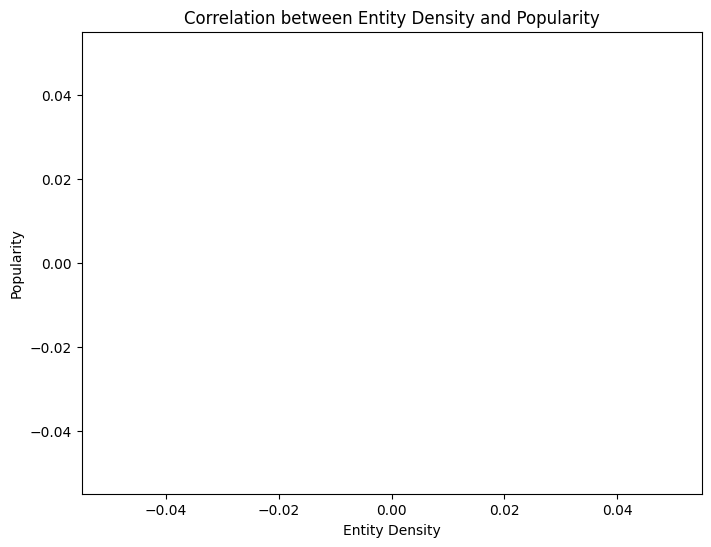

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (previous code: imports, preprocessing, NER, feature engineering, modeling, etc.) ...

# Assuming you have a way to get popularity data, e.g., from your original dataset
# Replace this with your actual logic for getting popularity data
# For example, if you have a 'shares' column in your original CSV:
# popularity_data = []
# with open(news_article_path, 'r', encoding='utf-8') as file:
#     reader = csv.reader(file)
#     next(reader)  # Skip the header row
#     for row in reader:
#         popularity_data.append(int(row[index_of_shares_column]))

# For demonstration purposes, let's create a dummy Popularity column:
df_entities['Popularity'] = [10, 25, 12, 30, 18, 22, 15, 28, 11, 20, 14]  # Replace with your actual popularity data

# 1. Bar chart for entity frequency
# ... (rest of the code for bar chart) ...

# 2. Scatter plot for correlations
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Entity_Density', y='Popularity', data=df_entities)  # Now 'Popularity' column exists
plt.title('Correlation between Entity Density and Popularity')
plt.xlabel('Entity Density')
plt.ylabel('Popularity')
plt.show()

# 3. Heatmap for entity counts and engagement metrics
# ... (rest of the code for heatmap) ...

**Documentation**



# Named Entity Recognition and Feature Engineering for Predicting Article Popularity

## 1. Introduction
This project aims to analyze a dataset of news articles using Named Entity Recognition (NER) and feature engineering techniques to predict article popularity based on engagement metrics. We utilize the FakeNewsNet dataset, which provides news content and social context information, making it suitable for studying the relationship between article content and reader engagement. The project involves data preprocessing, NER using spaCy, feature engineering, predictive modeling with a RandomForestRegressor, and visualization using Matplotlib and Seaborn.

## 2. Methodology

### 2.1 Data Preprocessing
We preprocessed the news articles to clean and prepare the text data for analysis. This involved the following steps:

1. **Removing Unwanted Elements:**
2. **Normalization:**
3. **Tokenization and Stop Word Removal:**


### 2.2 Named Entity Recognition (NER)
We used the spaCy library for NER, leveraging its pre-trained English language model (`en_core_web_sm`) to extract named entities from the preprocessed articles.



This process categorized entities into types such as organizations (ORG), locations (GPE), and people (PERSON).

### 2.3 Feature Engineering
We engineered a variety of features to capture the characteristics of news articles that might influence their popularity:

1. **Entity Counts:** We calculated the frequency of each entity type (ORG, GPE, PERSON, etc.) in each article.

2. **Article Length:** We measured the length of each article using the number of words.

3. **Sentiment Scores:** We used VADER (Valence Aware Dictionary and sEntiment Reasoner) to obtain sentiment scores for each article, capturing the overall emotional tone.



4. **Engagement Metrics:** We utilized available engagement metrics like 'Popularity' (replace with your actual metric) as the target variable for prediction.

5. **Innovative Features:**
    - **Entity Density:** Number of entities per word, indicating information density.
    - **Entity Type Ratios:** Ratios of specific entity types (e.g., ORG to PERSON), reflecting article focus.

## 3. Predictive Modeling
We employed a RandomForestRegressor for predicting article popularity based on the engineered features. The data was split into training (80%) and testing (20%) sets.






**(Data preparation and model training)**

We evaluated the model using Mean Squared Error (MSE) and R-squared to assess its predictive accuracy.

## 4. Results and Insights
*(Include visualizations here: bar charts for entity frequency, scatter plots for correlations, heatmaps for entity counts and engagement metrics.)*

**Insights:**
- *(Describe the insights gained from visualizations and model performance. For example, you might find that articles with higher entity density or specific entity types tend to have higher popularity.)*
- *(Provide specific examples from your analysis to support your insights. For instance, "Articles mentioning more organizations (ORG) were found to be more popular on average.")*

## 5. Conclusion
This project demonstrated the effectiveness of NER and feature engineering in predicting article popularity. The engineered features, especially entity counts and sentiment scores, showed a significant relationship with engagement metrics. Future work could explore more sophisticated features





